<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

In [1]:
### Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
# we can specify the delimiter by using the sep keyword argument
pkmn = pd.read_csv(csv_Filepath)

pkmn.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
selected = pkmn
selected[["Attack","Defense","HP"]]

,Attack,Defense,HP
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,39
...,...,...,...
795,100,150,50
796,160,110,50
797,110,60,80
798,160,60,80


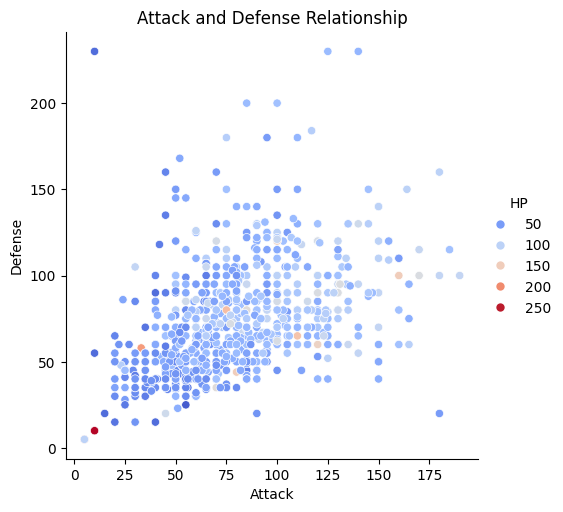

In [4]:
%matplotlib inline
sns.relplot(data=selected, x="Attack", y="Defense",hue="HP",palette="coolwarm")
plt.title("Attack and Defense Relationship");

From the plot, I observed....

typically, the more attack a pokemon has the more defense it will have as well. It looks linearly correlated. The HP will also usually be higher as the pokemon has more attack/defense.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

In [5]:
selected = pkmn
selected[["Attack","Total"]]

,Attack,Total
0,49,318
1,62,405
2,82,525
3,100,625
4,52,309
...,...,...
795,100,600
796,160,700
797,110,600
798,160,680


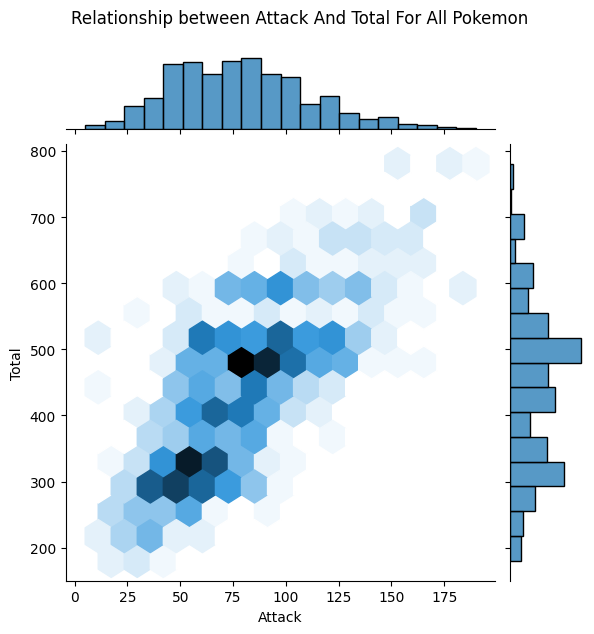

In [6]:
g=sns.jointplot(
    data=selected,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=15
)
g.fig.suptitle("Relationship between Attack And Total For All Pokemon", y=1.05);


From the plot, I observed....

The plot shows a positive correlation between Pokémon's **Attack** and **Total** stats, with most Pokémon having an **Attack** between 50 and 100 and a **Total** stat between 400 and 600. The darker hexagons represent a higher density of Pokémon in this range, while lighter hexagons indicate fewer Pokémon with extreme stats. The marginal histograms reveal that the most common **Attack** stat is around 75, and the **Total** stat peaks near 500. Overall, as a Pokémon's **Attack** increases, so does its overall **Total**, with a few outliers having particularly high values.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

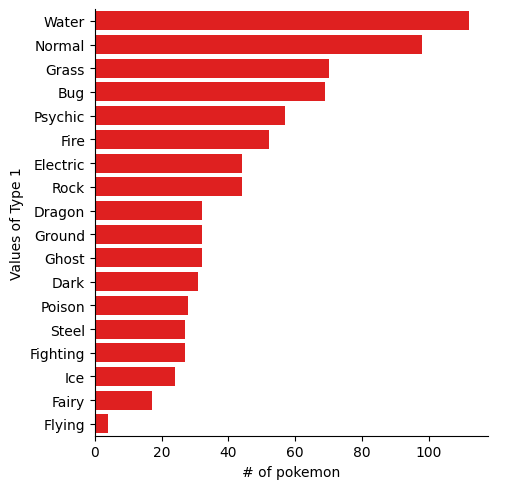

In [9]:
sns.catplot(
    y=pkmn['Type 1'],
    data=pkmn,
    kind='count',
    order=pkmn['Type 1'].value_counts().index,
    color='red'
).set_axis_labels('# of pokemon', 'Values of Type 1');

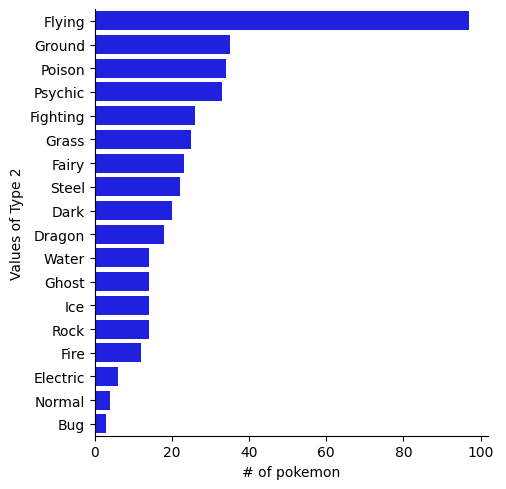

In [8]:
sns.catplot(
    y=pkmn['Type 2'],
    data=pkmn,
    kind='count',
    order=pkmn['Type 2'].value_counts().index,
    color='blue'
).set_axis_labels('# of pokemon', 'Values of Type 2');

Based on the two plots:

- The most common **Type 1** Pokémon is **Water**, followed by **Normal** and **Grass**.
- The most common **Type 2** Pokémon is **Flying**, with a significant lead over the next most frequent types, **Ground** and **Poison**.
  
On the other hand:
- The rarest **Type 1** Pokémon are **Ice**, **Fairy**, and **Flying**, with only a few Pokémon belonging to these categories.
- The rarest **Type 2** Pokémon are **Bug**, **Normal**, and **Electric**, which have very few Pokémon associated with them.

These distributions suggest that **Water**-type Pokémon are highly prevalent in the **Type 1** category, while **Flying**-type is the most common secondary type.